In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import pandas as pd
import spacy
from collections import Counter
from transformers import pipeline

In [40]:
# Cargar modelo de SpaCy en español
nlp = spacy.load("es_core_news_sm")



In [41]:
# Cargar analizador de sentimientos más adecuado para español
sentiment_analyzer = pipeline("text-classification", model="cardiffnlp/twitter-xlm-roberta-base-sentiment")

config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu


In [42]:
def analizar_sentimiento(texto):
    resultado = sentiment_analyzer(texto)[0]['label']
    # Convertimos etiquetas en valores numéricos:
    if resultado == "positive":
        return 1
    elif resultado == "neutral":
        return 0
    else:  # "negative"
        return -1

In [52]:
# 1. CREACIÓN DE LA RED SOCIAL
num_nodos = 50
porcentaje_milei = 0.7  # 70% Milei
nodos_milei = int(num_nodos * porcentaje_milei)
nodos_massa = num_nodos - nodos_milei

# Listas de mensajes con distinta carga emocional
mensajes_milei = [
    "Apoyamos las reformas y el cambio!",
    "Basta de corrupción, queremos libertad!",
    "Argentina necesita un giro hacia el futuro.",
    "Es momento de dejar el pasado atrás y avanzar.",
    "Tenemos esperanza en un cambio real."
]

mensajes_massa = [
    "Defendamos la justicia social y la equidad!",
    "El progreso debe ser para todos, no solo para unos pocos.",
    "Construyamos juntos un país con oportunidades.",
    "Equidad y desarrollo son el camino al futuro.",
    "Debemos pensar en el bienestar colectivo."
]

# Crear nodos con mensajes variados
usuarios = {}
for i in range(num_nodos):
    if i < nodos_milei:
        mensaje = random.choice(mensajes_milei)
        grupo = "Milei"
    else:
        mensaje = random.choice(mensajes_massa)
        grupo = "Massa"

    usuarios[i] = {"grupo": grupo, "mensaje": mensaje}
    G.add_node(i, grupo=grupo, mensaje=mensaje)



In [73]:
import pandas as pd

# Create a DataFrame from the 'usuarios' dictionary
usuarios_df = pd.DataFrame.from_dict(usuarios, orient='index')

# Display the DataFrame
print(usuarios_df)

    grupo                                            mensaje
0   Milei     Es momento de dejar el pasado atrás y avanzar.
1   Milei            Basta de corrupción, queremos libertad!
2   Milei                 Apoyamos las reformas y el cambio!
3   Milei            Basta de corrupción, queremos libertad!
4   Milei     Es momento de dejar el pasado atrás y avanzar.
5   Milei     Es momento de dejar el pasado atrás y avanzar.
6   Milei        Argentina necesita un giro hacia el futuro.
7   Milei     Es momento de dejar el pasado atrás y avanzar.
8   Milei     Es momento de dejar el pasado atrás y avanzar.
9   Milei               Tenemos esperanza en un cambio real.
10  Milei            Basta de corrupción, queremos libertad!
11  Milei     Es momento de dejar el pasado atrás y avanzar.
12  Milei        Argentina necesita un giro hacia el futuro.
13  Milei                 Apoyamos las reformas y el cambio!
14  Milei            Basta de corrupción, queremos libertad!
15  Milei            Bas

In [53]:
# 2. GENERACIÓN DE INTERACCIONES ENTRE NODOS
for i in range(num_nodos):
    num_interacciones = random.randint(1, 5)  # Cada usuario menciona de 1 a 5 nodos
    for _ in range(num_interacciones):
        mencionado = random.choice(list(usuarios.keys()))
        if mencionado != i:
            G.add_edge(i, mencionado)


In [54]:
# 3. ANÁLISIS EXPLORATORIO
print("Cantidad de usuarios por grupo:")
print(pd.Series([G.nodes[n]["grupo"] for n in G.nodes()]).value_counts())

Cantidad de usuarios por grupo:
Milei    35
Massa    15
Name: count, dtype: int64


In [55]:
# Tokenización y conteo de palabras
palabras = []
for nodo in G.nodes():
    doc = nlp(G.nodes[nodo]["mensaje"])
    palabras.extend([token.text.lower() for token in doc if not token.is_stop and not token.is_punct])

conteo_palabras = Counter(palabras)
print("\nPalabras más comunes en los mensajes:")
print(conteo_palabras.most_common(10))


Palabras más comunes en los mensajes:
[('cambio', 12), ('momento', 9), ('dejar', 9), ('atrás', 9), ('avanzar', 9), ('basta', 9), ('corrupción', 9), ('libertad', 9), ('futuro', 9), ('apoyamos', 7)]


In [56]:
# 4. ANÁLISIS DE MÉTRICAS DE RED
degree = dict(G.degree())  # Grado
betweenness = nx.betweenness_centrality(G)  # Intermediación
closeness = nx.closeness_centrality(G)  # Cercanía

# Convertir métricas a DataFrame
metricas_df = pd.DataFrame({
    "Nodo": list(G.nodes()),
    "Grupo": [G.nodes[n]["grupo"] for n in G.nodes()],
    "Grado": [degree[n] for n in G.nodes()],
    "Intermediación": [betweenness[n] for n in G.nodes()],
    "Cercanía": [closeness[n] for n in G.nodes()]
})
print(metricas_df.head(20))

    Nodo  Grupo  Grado  Intermediación  Cercanía
0      0  Milei     13        0.043310  0.500000
1      1  Milei     12        0.026528  0.445455
2      2  Milei      8        0.020300  0.441441
3      3  Milei     10        0.022412  0.411765
4      4  Milei      8        0.017807  0.404959
5      5  Milei     11        0.021744  0.385827
6      6  Milei     17        0.070284  0.395161
7      7  Milei     12        0.028803  0.457944
8      8  Milei      6        0.011509  0.352518
9      9  Milei     12        0.044683  0.437500
10    10  Milei      7        0.007590  0.360294
11    11  Milei     10        0.024946  0.376923
12    12  Milei      6        0.010130  0.357664
13    13  Milei     10        0.025566  0.408333
14    14  Milei     14        0.034842  0.457944
15    15  Milei     13        0.032489  0.401639
16    16  Milei      8        0.013852  0.368421
17    17  Milei      8        0.015726  0.395161
18    18  Milei     13        0.058661  0.368421
19    19  Milei     

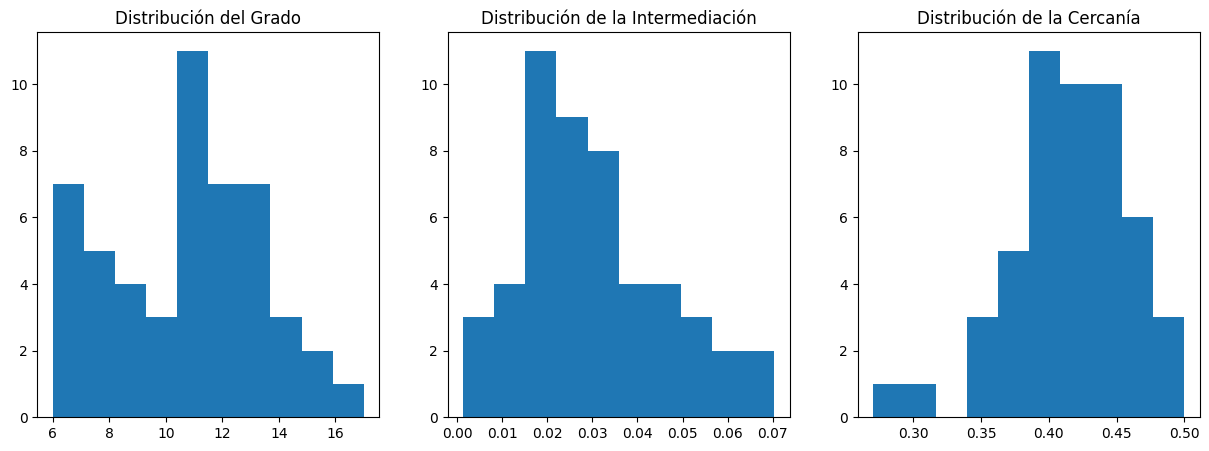

In [62]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(metricas_df["Grado"], bins=10)
axes[0].set_title("Distribución del Grado")

axes[1].hist(metricas_df["Intermediación"], bins=10)
axes[1].set_title("Distribución de la Intermediación")

axes[2].hist(metricas_df["Cercanía"], bins=10)
axes[2].set_title("Distribución de la Cercanía")

plt.show()

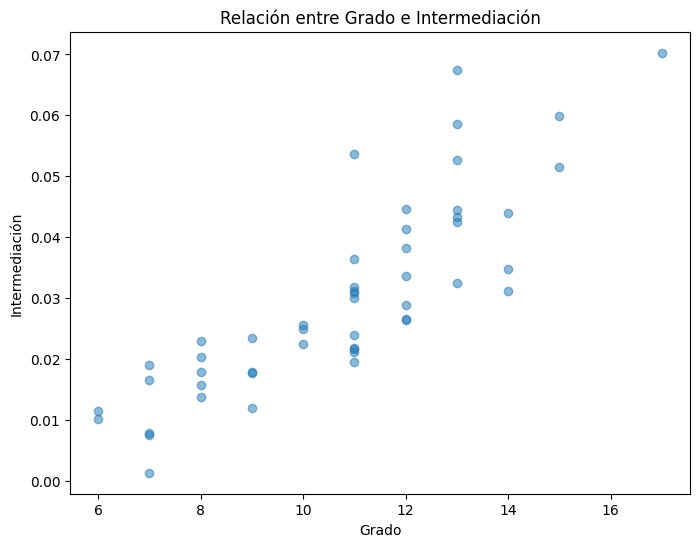

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(metricas_df["Grado"], metricas_df["Intermediación"], alpha=0.5)
plt.title("Relación entre Grado e Intermediación")
plt.xlabel("Grado")
plt.ylabel("Intermediación")
plt.show()

In [57]:
# 5. ANÁLISIS DE SENTIMIENTOS
for nodo in G.nodes():
    mensaje = G.nodes[nodo]["mensaje"]
    score = analizar_sentimiento(mensaje)  # Polaridad del mensaje
    G.nodes[nodo]["sentimiento"] = score
    metricas_df.loc[metricas_df["Nodo"] == nodo, "Sentimiento"] = score



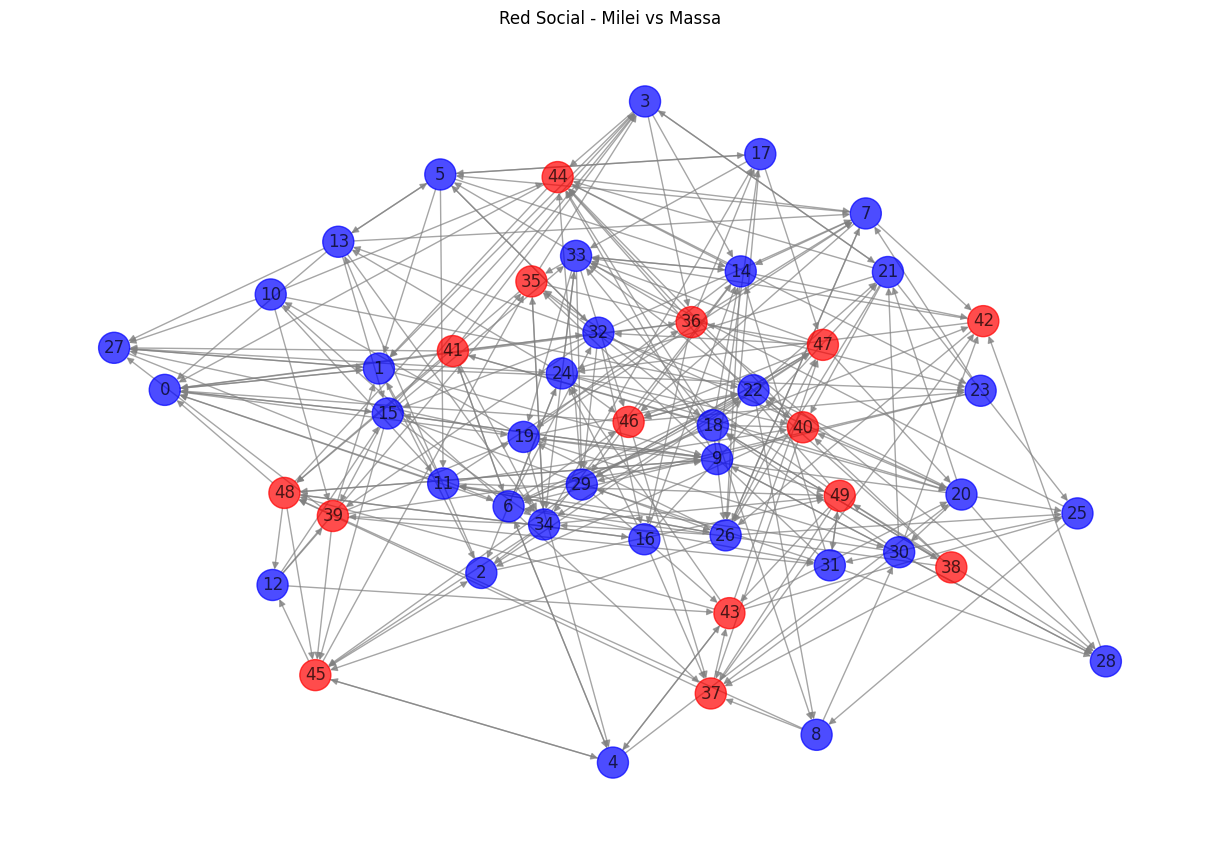

In [58]:
# 6. VISUALIZACIÓN DE LA RED
plt.figure(figsize=(12, 8))

# Colores según grupo
color_map = ["blue" if G.nodes[n]["grupo"] == "Milei" else "red" for n in G.nodes()]

pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color=color_map, edge_color="gray", node_size=500, alpha=0.7)
plt.title("Red Social - Milei vs Massa")
plt.show()

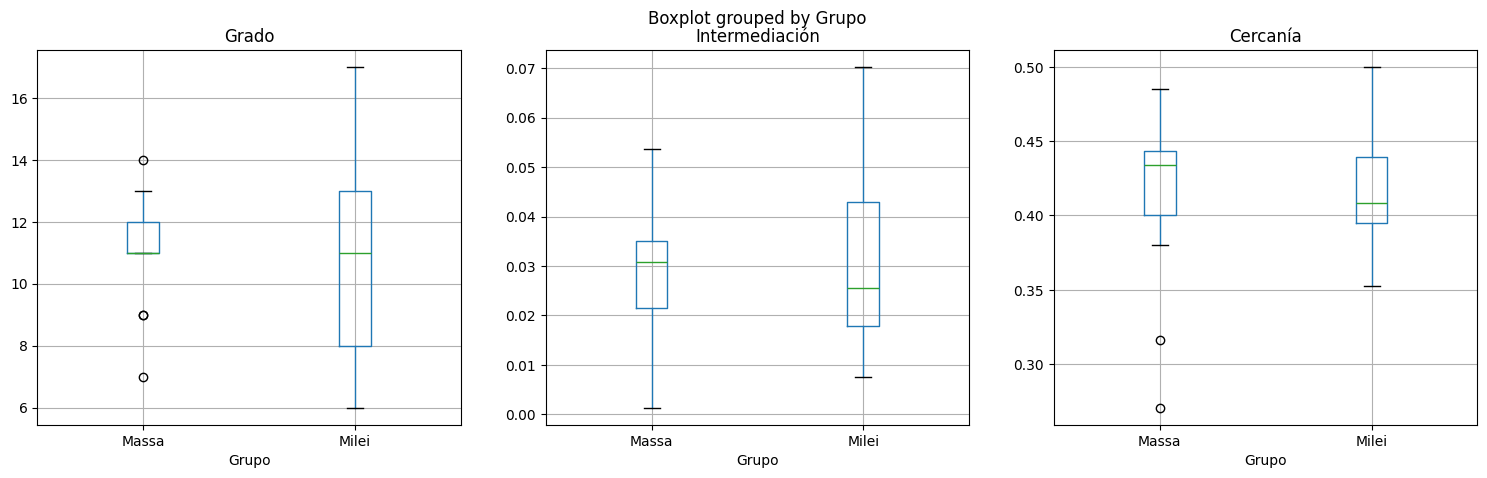

In [59]:
# 7. VISUALIZACIÓN DE MÉTRICAS
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
metricas_df.boxplot("Grado", by="Grupo", ax=ax[0])
metricas_df.boxplot("Intermediación", by="Grupo", ax=ax[1])
metricas_df.boxplot("Cercanía", by="Grupo", ax=ax[2])
plt.show()


In [60]:
metricas_df["Sentimiento"] = pd.to_numeric(metricas_df["Sentimiento"], errors="coerce").fillna(0)


<Figure size 1000x500 with 0 Axes>

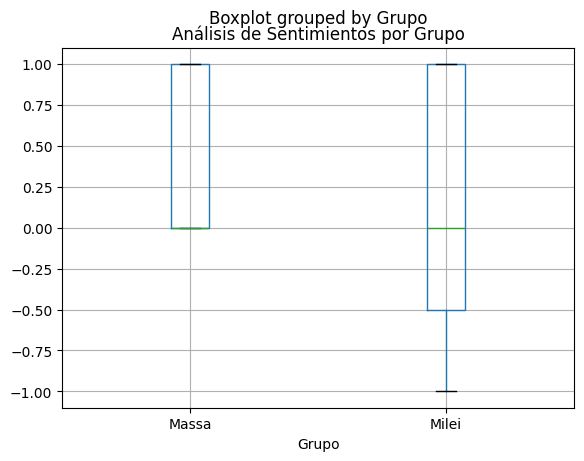

In [61]:
# 8. MOSTRAR ANÁLISIS DE SENTIMIENTOS
metricas_df["Sentimiento"] = pd.to_numeric(metricas_df["Sentimiento"], errors="coerce").fillna(0)  # Asegurar valores numéricos

plt.figure(figsize=(10, 5))
metricas_df.boxplot("Sentimiento", by="Grupo")
plt.title("Análisis de Sentimientos por Grupo")
plt.show()


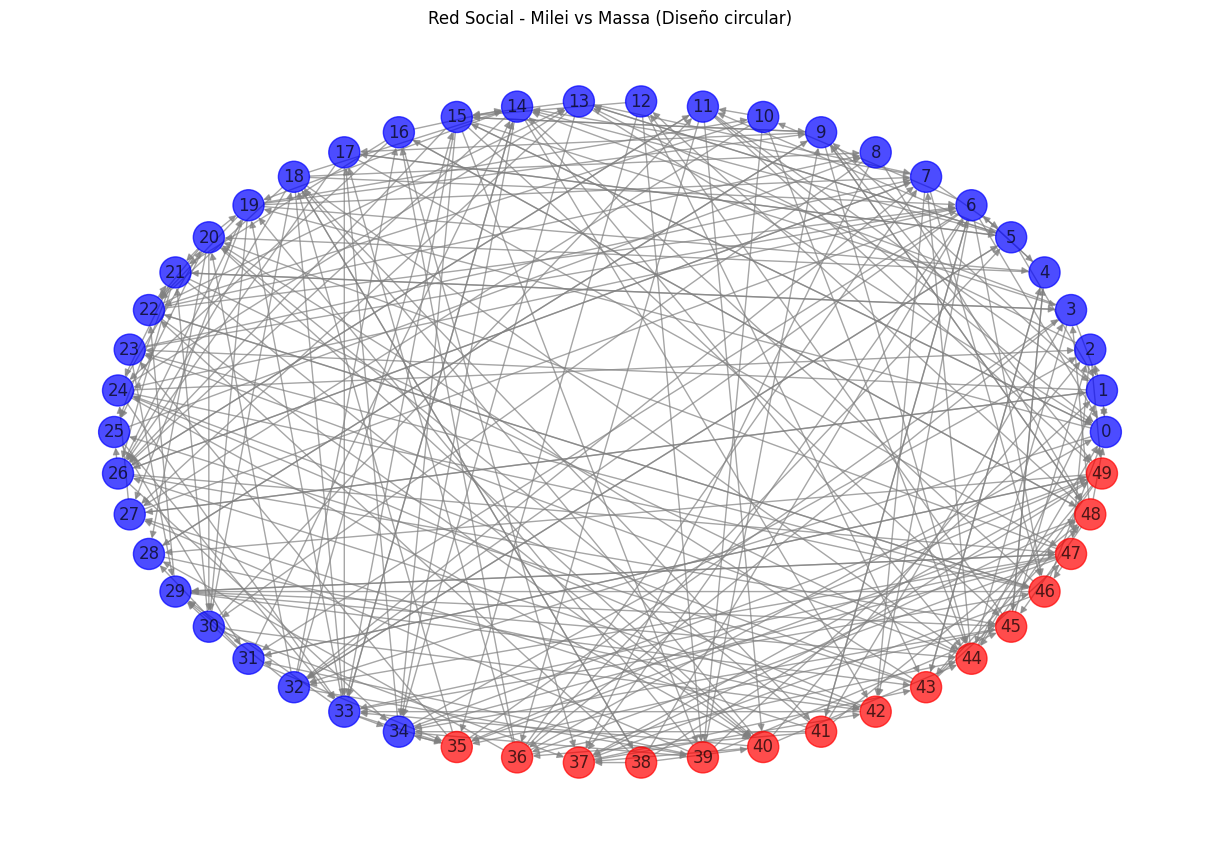

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Colores según grupo
color_map = ["blue" if G.nodes[n]["grupo"] == "Milei" else "red" for n in G.nodes()]

pos = nx.circular_layout(G)  # Diseño circular
nx.draw(G, pos, with_labels=True, node_color=color_map, edge_color="gray", node_size=500, alpha=0.7)
plt.title("Red Social - Milei vs Massa (Diseño circular)")
plt.show()

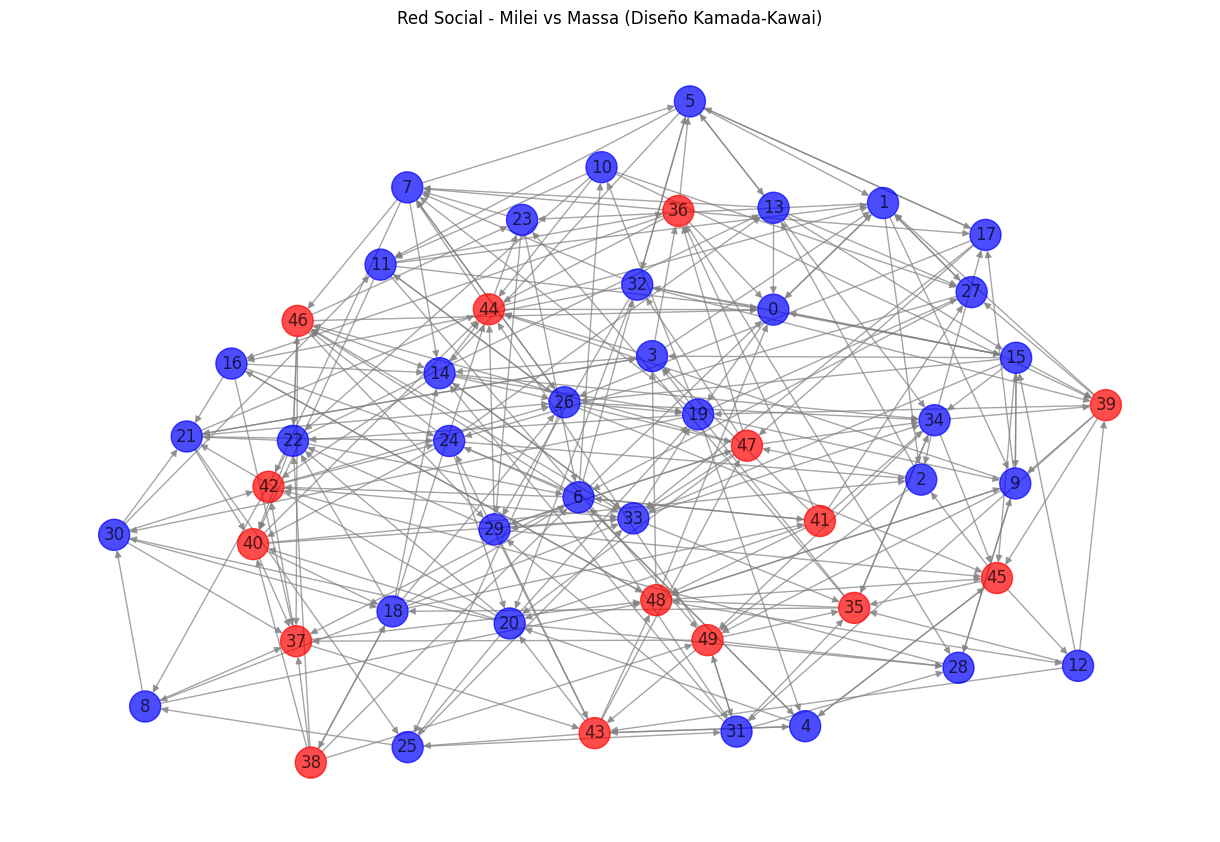

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Colores según grupo
color_map = ["blue" if G.nodes[n]["grupo"] == "Milei" else "red" for n in G.nodes()]

pos = nx.kamada_kawai_layout(G)  # Diseño Kamada-Kawai
nx.draw(G, pos, with_labels=True, node_color=color_map, edge_color="gray", node_size=500, alpha=0.7)
plt.title("Red Social - Milei vs Massa (Diseño Kamada-Kawai)")
plt.show()

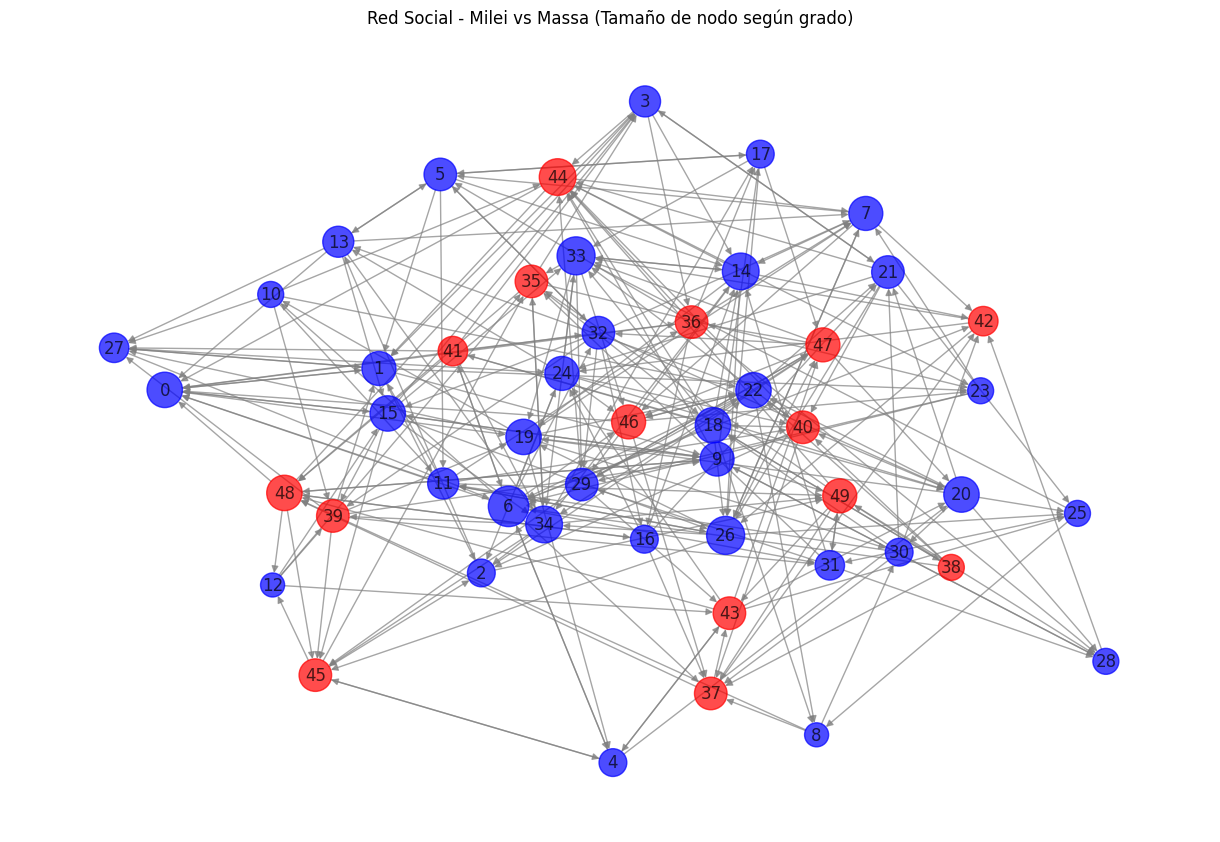

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Colores según grupo
color_map = ["blue" if G.nodes[n]["grupo"] == "Milei" else "red" for n in G.nodes()]

# Tamaño de nodo según grado
node_sizes = [degree[n] * 50 for n in G.nodes()]  # Ajusta el factor 50 para el tamaño deseado

pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color=color_map, edge_color="gray", node_size=node_sizes, alpha=0.7)
plt.title("Red Social - Milei vs Massa (Tamaño de nodo según grado)")
plt.show()